In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import folium

subway = pd.read_csv('subway_final_final.csv', encoding='cp949')
subway1 = subway.groupby(['date', '구명'])['geton', 'geton'].sum()
subway1

geton     geton
date   구명                     
201701 강남구  16303391  16303391
       강동구   4157161   4157161
       강북구   2779259   2779259
       강서구   6518041   6518041
       관악구   3621250   3621250
...              ...       ...
201911 용산구   5038366   5038366
       은평구   5968717   5968717
       종로구   9851427   9851427
       중구   11370898  11370898
       중랑구   3421570   3421570

[875 rows x 2 columns]

In [88]:
data = pd.read_csv('final_data_add.csv', encoding='cp949')
data

,사용년월,구별,거치대수,대여건수,getoff,geton,총승차수,총하차수,sub_u,bus_u
0,201701,광진구,15.357143,163.857143,6.009987e+05,602092.285714,22504.831418,21600.256705,601545.500000,22052.544061
1,201701,동대문구,13.135135,147.135135,6.243434e+05,621965.285714,41038.143791,38748.660131,623154.357143,39893.401961
2,201701,마포구,13.897059,247.632353,6.668218e+05,647081.733333,37558.860806,35588.380952,656951.766667,36573.620879
3,201701,서대문구,13.619048,148.619048,2.946926e+05,296786.800000,33935.427907,32564.469767,295739.700000,33249.948837
4,201701,성동구,12.367347,153.918367,4.131113e+05,411547.818182,18396.094148,18102.251908,412329.545455,18249.173028
...,...,...,...,...,...,...,...,...,...,...
811,201911,용산구,13.794872,740.410256,3.984387e+05,387566.615385,13877.183801,13225.096573,393002.653846,13551.140187
812,201911,은평구,11.435484,747.838710,4.790538e+05,497393.083333,11186.321285,10715.646586,488223.416667,10950.983936
813,201911,종로구,11.529412,1058.235294,1.002094e+06,985142.700000,16772.886686,16927.532578,993618.400000,16850.209632
814,201911,중구,11.619048,947.190476,9.672572e+05,947574.833333,22785.378531,23005.785311,957416.041667,22895.581921


In [38]:
geo_path = 'geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map_sub = folium.Map(location=[37.5508, 126.982], zoom_start =11,  tiles='Stamen Toner')

map_sub.choropleth(geo_data = geo_str,
                    data = data['sub_u'],
                    columns=[data.index, data['sub_u']],
                    fill_color='Blues',
                    key_on='feature.id')

map_sub

In [36]:
geo_path = 'geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map_bus = folium.Map(location=[37.5508, 126.982], zoom_start =11, tiles='Stamen Toner')

map_bus.choropleth(geo_data = geo_str,
                    data = data['bus_u'],
                    columns=[data.index, data['bus_u']],
                    fill_color='Greens',
                    key_on='feature.id')

map_bus

In [56]:
# total = 구별 대어건수 구하기

data2= data.groupby('구별')['대여건수', '거치대수'].mean()
data3 = pd.DataFrame(data2)
data3.sort_values('대여건수', ascending = False).head()
# data3.sort_values('대여건수', ascending = False).tail()


,대여건수,거치대수
구별,,
광진구,1149.930398,14.789708
마포구,1134.706060,13.757235
영등포구,1068.942340,14.547494
송파구,923.284505,13.392398
종로구,871.568113,11.584935


,Unnamed: 0,대여소번호,사용년월,대여소,대여건수,구별,대여소명,대여소주소,위도,경도,거치대수
0,0,108,201701,서교동 사거리,246,마포구,108. 서교동 사거리,서울특별시 마포구 양화로 93,37.552746,126.918617,10
1,14441,215,201701,여의도고교 앞,54,영등포구,215. 여의도고교 앞,서울특별시 영등포구 국제금융로7길 37,37.524837,126.934906,10
2,14405,220,201701,미성아파트 A동 앞,184,영등포구,220. 미성아파트 A동 앞,서울특별시 영등포구 의사당대로 110,37.519363,126.926048,30
3,14369,219,201701,롯데캐슬엠파이어 옆,146,영등포구,219. 롯데캐슬엠파이어 옆,서울특별시 영등포구 의사당대로 127,37.520695,126.925835,12
4,4056,157,201701,애오개역 4번출구 앞,284,마포구,157. 애오개역 4번출구 앞,서울특별시 마포구 아현동 607-1,37.553001,126.956688,12
...,...,...,...,...,...,...,...,...,...,...,...
41483,33742,2167,201911,2167. 낙성대역 1번출구,400,관악구,2167. 낙성대역 1번출구,서울특별시 관악구 남부순환로 1944,37.476295,126.964958,12
41484,3371,381,201911,381. 장충체육관,180,중구,381. 장충체육관,서울특별시 중구 장충동2가 200-99,37.558533,127.006989,10
41485,16033,1012,201911,1012. 서울 상운차량,962,강동구,1012. 서울 상운차량,서울특별시 강동구 올림픽로 610,37.536026,127.122726,15
41486,16000,1011,201911,1011. LIGA 아파트 앞,2492,강동구,1011. LIGA 아파트 앞,서울특별시 강동구 천호대로 1120,37.534771,127.135239,20


In [1]:
ddar= pd.read_csv('data_total/따릉이.csv', encoding='cp949')
ddar2 = ddar.groupby(['구별'])['대여건수','거치대수'].mean()
ddar2 = pd.DataFrame(ddar2)
ddar3 = ddar2.sort_values(['대여건수', '거치대수'], ascending = False)
ddar3
ddar3.head()
# ddar3.tail()


NameError: name 'pd' is not defined

In [143]:
top5_1 = data[data['구별'] == '광진구']
top5_2 = data[data['구별'] == '마포구']
top5_3 = data[data['구별'] == '영등포구']
top5_4 = data[data['구별'] == '송파구']
top5_5 = data[data['구별'] == '종로구']

top5 = pd.concat([top5_1,top5_2,top5_3,top5_4,top5_5])
top5.to_csv('data_top5.csv', encoding = 'utf-8')



In [144]:
tail5_1 = data[data['구별'] == '양천구']
tail5_2 = data[data['구별'] == '용산구']
tail5_3 = data[data['구별'] == '금천구']
tail5_4 = data[data['구별'] == '강북구']
tail5_5 = data[data['구별'] == '도봉구']

tail5 = pd.concat([tail5_1,tail5_2,tail5_3,tail5_4,tail5_5])
tail5.to_csv('data_tail5.csv', encoding = 'utf-8')


In [130]:
top6 = top5.groupby(['구별', '사용년월'])['대여건수'].sum()

top6


구별    사용년월  
광진구   201701     163.857143
      201702     160.107143
      201703     425.035714
      201704     738.392857
      201705    1041.964286
                   ...     
영등포구  201907    1990.168539
      201908    2011.078652
      201909    1955.157303
      201910    2249.382022
      201911    1393.943820
Name: 대여건수, Length: 171, dtype: float64

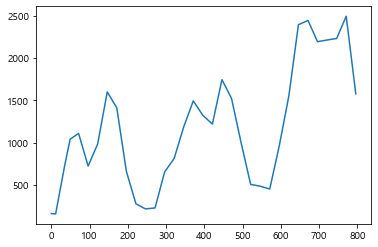

In [132]:
# 한글문제 해결처리 
################################################################
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
import platform
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')


top5_1['대여건수'].plot()
